In [5]:
import pandas as pd
import numpy as np
import pandas_ta as pta
import ta
# from datapackage import Package
# from selenium import webdriver
# import requests
# from bs4 import BeautifulSoup
import yfinance as yf
import os
import random
import shutil
import time
from tensorflow.keras.layers import LSTM
import tensorflow as tf
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from numpy import array
from tensorflow.keras.utils import plot_model
import graphviz
import pydot
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
import datetime as dt

In [2]:
bac = pd.read_csv("data/BAC.csv")

In [3]:
bac.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1973-02-21 00:00:00-05:00,1.640599,1.640599,1.640599,1.640599,99200,0.0,0.0
1,1973-02-22 00:00:00-05:00,1.646143,1.646143,1.646143,1.646143,47200,0.0,0.0
2,1973-02-23 00:00:00-05:00,1.640599,1.640599,1.640599,1.640599,133600,0.0,0.0
3,1973-02-26 00:00:00-05:00,1.640599,1.640599,1.640599,1.640599,24000,0.0,0.0
4,1973-02-27 00:00:00-05:00,1.640599,1.640599,1.640599,1.640599,41600,0.0,0.0


In [4]:
bac.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [5]:
bac.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,12553.000000,12553.000000,12553.000000,12553.000000,1.255300e+04,12553.000000,12553.000000
mean,12.116187,12.490716,12.202913,12.345296,3.851739e+07,0.002077,0.000478
std,11.974804,11.861357,11.627534,11.744054,7.879038e+07,0.026092,0.030916
min,0.000000,0.310384,0.293756,0.293756,0.000000e+00,0.000000,0.000000
25%,0.000000,1.762537,1.740367,1.740367,3.992000e+05,0.000000,0.000000
50%,9.309741,9.444984,9.174907,9.281268,5.502000e+06,0.000000,0.000000
75%,20.281914,20.550445,19.988837,20.248503,4.709940e+07,0.000000,0.000000
max,49.059483,49.256076,48.194476,48.538517,1.226791e+09,0.640000,2.000000


In [6]:
msft = pd.read_csv("data/MSFT.csv")

In [7]:
msft.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,9254.000000,9254.000000,9254.000000,9254.000000,9.254000e+03,9254.000000,9254.000000
mean,40.121534,40.544573,39.683818,40.129057,5.819775e+07,0.002653,0.001837
std,66.350809,67.032187,65.619593,66.357826,3.832749e+07,0.043957,0.059237
min,0.055380,0.057551,0.055380,0.056465,2.304000e+06,0.000000,0.000000
25%,3.139521,3.194493,3.111424,3.140132,3.397640e+07,0.000000,0.000000
50%,19.007199,19.202058,18.818486,19.006570,5.150220e+07,0.000000,0.000000
75%,31.098146,31.338903,30.623183,31.071308,7.197510e+07,0.000000,0.000000
max,341.420804,346.423942,339.023340,339.924866,1.031789e+09,3.080000,2.000000


In [8]:
meta = pd.read_csv("data/META.csv")
meta.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,2650.000000,2650.000000,2650.000000,2650.000000,2.650000e+03,2650.0,2650.0
mean,148.231845,150.103328,146.355091,148.255915,3.119753e+07,0.0,0.0
std,87.296744,88.392615,86.238345,87.329082,2.730478e+07,0.0,0.0
min,18.080000,18.270000,17.549999,17.730000,5.913100e+06,0.0,0.0
25%,77.589996,78.315002,76.852499,77.627502,1.614525e+07,0.0,0.0
50%,143.519997,145.889999,141.870003,144.195000,2.312335e+07,0.0,0.0
75%,192.012493,194.522499,188.837505,191.644997,3.612215e+07,0.0,0.0
max,381.679993,384.329987,378.809998,382.179993,5.735764e+08,0.0,0.0


In [9]:
tsla = pd.read_csv("data/TSLA.csv")
tsla.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,3126.000000,3126.000000,3126.000000,3126.000000,3.126000e+03,3126.0,3126.000000
mean,58.090082,59.388876,56.662687,58.052713,9.328180e+07,0.0,0.002559
std,95.591549,97.786622,93.118687,95.472408,8.183243e+07,0.0,0.104276
min,1.076000,1.108667,0.998667,1.053333,1.777500e+06,0.0,0.000000
25%,8.562334,8.707500,8.335667,8.484334,4.204950e+07,0.0,0.000000
50%,16.146667,16.411666,15.865666,16.159000,7.554450e+07,0.0,0.000000
75%,24.126667,24.485834,23.605000,24.032499,1.170645e+08,0.0,0.000000
max,411.470001,414.496674,405.666656,409.970001,9.140820e+08,0.0,5.000000


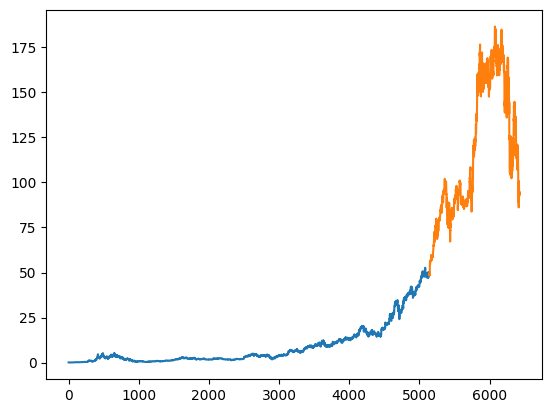

In [21]:
import matplotlib.pyplot as plt

msft_csv = pd.read_csv("data/AMZN.csv")
plt.plot(msft_csv["Close"][:int(len(msft_csv) * 0.8)])
plt.plot(msft_csv["Close"][int(len(msft_csv) * 0.8):])
plt.show()

In [7]:
import yfinance as yf
import datetime as dt
import pandas as pd

i = "AMZN"
ticker = yf.Ticker(i)
hist = ticker.history(start=dt.date.today() - dt.timedelta(days=3))
pd.DataFrame(hist).to_csv(i + "_last_3_days.csv")

In [12]:
hist["Close"][2]

96.54000091552734

In [40]:
i = "AMZN"
list_of_prices = []
ticker = yf.Ticker(i.replace(".", "-"))
hist = ticker.history(end = dt.date.today(), start = str(np.busday_offset(dates=dt.date.today(), offsets=-20, roll='backward'))) #Gets last 20 working (hopefully, trading) days
if (os.path.isdir(r"D:\Documents\Ironhack\Final Project\Flask\recent_history") == False):
	os.mkdir(r"D:\Documents\Ironhack\Final Project\Flask\recent_history")
for csv in os.listdir(r"D:\Documents\Ironhack\Final Project\Flask\recent_history"):
	os.remove(csv)
pd.DataFrame(hist).to_csv("recent_history/" + i + "_last_20_days.csv")
list_of_prices.append((i, round(hist["Close"][len(hist) - 1], 2))) #Gets a tuple with the stock ticker and the Close price of the last row, rounded to two digits
price_df = pd.DataFrame(columns=["Stock", "Price"])

	# price_df = pd.concat([price_df, pd.DataFrame(list_of_prices[price])], axis = 0)
price_df

,Stock,Price
0,AMZN,96.54


In [47]:
macr_ticker = yf.Ticker("LEHMQ")

In [51]:
macr = macr_ticker.history(start="1957-08-01")

- LEHMQ: No data found for this date range, symbol may be delisted


In [54]:
id(macr)

2833373466048

In [58]:
joka = macr
id(joka)

2833373466048

In [59]:
macr = 22
joka

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [62]:
help(del)

SyntaxError: invalid syntax (712162343.py, line 1)